In [1]:
# content based recommendation system using cosine similarity measure.

![cosine similarity formula](<attachment:Screenshot 2023-11-24 064641.png>)

# -1 -> inversely proportional
# +1 -> directly proportional
# 0 -> not proportional
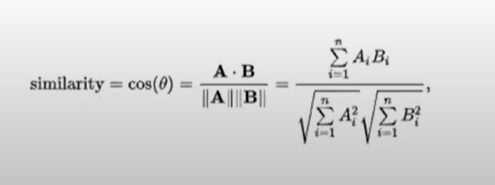

In [29]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
df = pd.read_csv('data.csv') # this is a precleaned dataset
df.head(3)

,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription
0,Pulp Fiction,1994,8.9,94.0,154,"1,871,051",$107.93,\nCrime Drama,Quentin Tarantino John Travolta Uma Thurman Sa...,\nThe lives of two mob hitmen a boxer a gangst...
1,The Amazing Spider-Man 2,2014,6.6,53.0,142,"425,529",$202.85,\nAction Adventure Fantasy,Marc Webb Andrew Garfield Emma Stone Jamie Fox...,\nWhen New York is put under siege by Oscorp i...
2,The Shawshank Redemption,1994,9.3,80.0,142,"2,409,436",$28.34,\nDrama,Frank Darabont Tim Robbins Morgan Freeman Bob ...,\nTwo imprisoned men bond over a number of yea...


In [13]:
df.shape

(9937, 10)

In [14]:
df.isnull().sum()

Name                 0
Year               183
Stars              212
Score             3792
Time               215
Votes              201
Total             3045
Tags                 8
Directors_Cast      84
Discription       3792
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            9937 non-null   object 
 1   Year            9754 non-null   object 
 2   Stars           9725 non-null   float64
 3   Score           6145 non-null   float64
 4   Time            9722 non-null   object 
 5   Votes           9736 non-null   object 
 6   Total           6892 non-null   object 
 7   Tags            9929 non-null   object 
 8   Directors_Cast  9853 non-null   object 
 9   Discription     6145 non-null   object 
dtypes: float64(2), object(8)
memory usage: 776.5+ KB


In [17]:
df.columns

Index(['Name', 'Year', 'Stars', 'Score', 'Time', 'Votes', 'Total', 'Tags',
       'Directors_Cast', 'Discription'],
      dtype='object')

In [68]:
# including movie_id
df['movie_id'] = [i for i in range(len(df))]
df.head(2)

,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription,important_features,movie_id
0,Pulp Fiction,1994,8.9,94.0,154,"1,871,051",$107.93,\nCrime Drama,Quentin Tarantino John Travolta Uma Thurman Sa...,\nThe lives of two mob hitmen a boxer a gangst...,\nCrime Drama Quentin Tarantino Joh...,0
1,The Amazing Spider-Man 2,2014,6.6,53.0,142,"425,529",$202.85,\nAction Adventure Fantasy,Marc Webb Andrew Garfield Emma Stone Jamie Fox...,\nWhen New York is put under siege by Oscorp i...,\nAction Adventure Fantasy Marc Web...,1


In [69]:
df.fillna('', inplace = True)

df['important_features'] = df.Tags + df.Directors_Cast + df.Discription

In [70]:
cv = CountVectorizer()
vec = cv.fit_transform(df['important_features'])
vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
# cosine_similarity

_vec = cosine_similarity(vec)

In [72]:
_vec # each row is a movie and values in that row is cosine similarity between that movie and other movies.

array([[1.        , 0.02001602, 0.25923792, ..., 0.        , 0.04811252,
        0.        ],
       [0.02001602, 1.        , 0.        , ..., 0.        , 0.23112508,
        0.        ],
       [0.25923792, 0.        , 1.        , ..., 0.05184758, 0.        ,
        0.1796053 ],
       ...,
       [0.        , 0.        , 0.05184758, ..., 1.        , 0.        ,
        0.28867513],
       [0.04811252, 0.23112508, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.1796053 , ..., 0.28867513, 0.        ,
        1.        ]])

In [73]:
# as i said above, each rows is a movie and each value in the row is the cosine similarity with other movies. 
i = [x for x in df.Name]
_vec = pd.DataFrame(_vec, columns = i, index = i)
_vec.head()

,Pulp Fiction,The Amazing Spider-Man 2,The Shawshank Redemption,Star Wars: Episode IV - A New Hope,Back to the Future,The Breakfast Club,The Goonies,The Silence of the Lambs,Jurassic Park,The Lion King,...,By the Sea,Allied,Americanah,Mojave,The Sea of Trees,Cell,Geralds Game,Liseys Story,John Wick: Chapter 2,The Company Man
Pulp Fiction,1.000000,0.020016,0.259238,0.075165,0.042563,0.168394,0.136931,0.200446,0.067625,0.142374,...,0.026803,0.125000,0.000000,0.028307,0.125630,0.123768,0.169120,0.000000,0.048113,0.000000
The Amazing Spider-Man 2,0.020016,1.000000,0.000000,0.234701,0.122679,0.000000,0.109632,0.106990,0.173259,0.182384,...,0.077254,0.100080,0.000000,0.081589,0.072421,0.237826,0.252755,0.000000,0.231125,0.000000
The Shawshank Redemption,0.259238,0.000000,1.000000,0.023383,0.026481,0.059868,0.085194,0.083141,0.056099,0.029527,...,0.033352,0.051848,0.056796,0.070447,0.062531,0.000000,0.070148,0.051848,0.000000,0.179605
Star Wars: Episode IV - A New Hope,0.075165,0.234701,0.023383,1.000000,0.115172,0.021698,0.144093,0.120532,0.162657,0.149820,...,0.072526,0.075165,0.000000,0.076596,0.135978,0.133963,0.237288,0.000000,0.173585,0.000000
Back to the Future,0.042563,0.122679,0.026481,0.115172,1.000000,0.098295,0.093250,0.068252,0.115133,0.121197,...,0.027379,0.170251,0.000000,0.115663,0.076999,0.075858,0.115172,0.000000,0.073721,0.000000


In [78]:
# finding the index fo a movie
# movie = Spider-Man
index = df[df.Name == 'Spider-Man']['movie_id'].values[0]
similarity_spider_man = _vec.iloc[233]
similarity_spider_man = pd.DataFrame(similarity_spider_man)
similarity_spider_man.sort_values(by = "Spider-Man", ascending = False, inplace = True)
similarity_spider_man.head(6) # these are the top 5 movies that are similar to movie = Spider-Man

,Spider-Man
Spider-Man,1.000000
Spider-Man 2,0.371305
Spider-Man 3,0.308158
The Amazing Spider-Man,0.297940
Starship Troopers,0.288675
Robotech,0.288675
